# Project: Investigate a Dataset - [TMDB-Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I am using the TMDB movies dataset

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue

### Dataset Description 

> This data set consist of 21 columns such as imdb_id, revenue, budget, vote_count etc. and contains over 10 thousand movies for analysis and it's all in one table and I'll be reviewing relationships between these columns and find patterns to complete my analysis

### Question(s) for Analysis
1.Movies which had most and least profit

2.Movies with largest and lowest budgets

3.Movies with most and least earned revenue

4.Movies with longest and shortest runtime values

5.Average runtime of all the movies

6.In which year we had most no. of profitable movies

7.Successful genres (with respect to the profitable movies)

8.Most frequent cast (with respect to the profitable movies)

9.Average budget (with respect to the profitable movies)

10.Average revenue (with respect to the profitable movies)

11.Average duration of the movie (with respect to the profitable movies)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
% matplotlib inline

In [25]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section I'll be cleaning and organizing the data set so the conclusions can be resonable and understandable

### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Loading the csv file in a variable named "df" and printing the first 4 rows
df = pd.read_csv('/home/workspace/Database_TMDb_movie_data/tmdb-movies.csv')
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### **Observations from the Dataset**
> 1- I need to drop the duplicated rows (if there are any) and unused columns from the dataset. 

> 2- in the budget and revenue columns there is no currency mentioned so I will consider it as U.S Dollars.

> 3- the vote_count and vote_average columns are theoritcally not important since I'm looking for fact conclusions.


### Data Cleaning
> 1. Remove unused columns.
2. Remove duplicate rows.
3. Change release date to date format.
4. Replace zeros in runtime column with NaN and drop them.
5. Replace zeros in budget and revenue columns with NaN and droping them.
6. Change the data types of budget and revenue and runtime columns.

**1. Remove unused columns** 
such as: (id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average)

In [3]:
# putting the columns in a list to be deleted easily
deleted_columns = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# deleting the columns from the dataset
df = df.drop(deleted_columns, axis=1)

In [4]:
#viewing the new data 
df.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


**2. Remove duplicate rows**

In [5]:
# check if there are duplicates
df.duplicated().sum()
# there is 1 duplicated row 

1

In [6]:
# removing the duplicated row 
df.drop_duplicates(keep='first', inplace=True)
# checking again for duplicates 
df.duplicated().sum()
#there's no duplicates now

0

**3. Change the release date to date format** 

In [7]:
df.release_date = pd.to_datetime(df['release_date'])
#reviewing the data to double check on the release_date column
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


**4. Replace zeros in runtime column with NaN and drop them**

In [8]:
#Checking if there is zeros in runtime
run = df.runtime == 0
run.sum()
# there are 31 zeros in there

31

In [9]:
#Converting zeros with NaN
df.runtime = df.runtime.replace(0, np.NaN)

In [10]:
# droping NaN values from runtime
df.dropna(inplace=True)
#checking the data shape
df.shape
# now we have 7997 rows and 10 columns

(7997, 10)

**5. Replace zeros in budget and revenue columns with NaN and droping them**

In [11]:
#checking if there is any zeros in the columns mentioned above
budg = df.budget == 0
bud_res = budg.sum()
print('Theres is {} zeros in the budget column'.format(bud_res))
revn = df.revenue == 0
rev_res = revn.sum()
print('There is {} zeros in the revenue column'.format(rev_res))

Theres is 3451 zeros in the budget column
There is 3614 zeros in the revenue column


In [12]:
#replacing zeros with NaN in the above columns 
#creating a list of the two columns 
rep_list = ['budget', 'revenue']
df[rep_list] = df[rep_list].replace(0, np.NaN)

#droping the NaN values
df.dropna(subset = rep_list, inplace=True)

In [13]:
# after removing the entries I will check for the dataset shape again
rows, col = df.shape
print('There are {} rows and {} columns'.format(rows-1, col))

There are 3571 rows and 10 columns


In [14]:
#checking the data types of the dataset
df.dtypes
# the data type of budget and revenue and runtime changed so I will rechange it with int64

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

**6. Change the data types of budget and revenue and runtime columns**

In [15]:
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['runtime'] = df['runtime'].astype(int)
# Checking hte data types again
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [16]:
# checking last time for the final shape and head of our dataset 
rows, col = df.shape
print('There are {} rows and {} columns'.format(rows-1, col))
df.head(2)

There are 3571 rows and 10 columns


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


<a id='eda'></a>
## Exploratory Data Analysis


**calculating the profit**

In [17]:
profit = df['revenue'] - df['budget']
#inserting the profit column at the first of the dataset
df.insert(0, 'profit', profit)

In [18]:
df.head(2)

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### Research Question 1 (Movies which had most and least profit)

In [19]:
# defining a function to help with calculating each high and low values 
def calculate(x):
    '''This function calculates the highest and lowest values of a specific column
    of choice to explore the dataset we have and make the code cleaner
    
    '''
    #calculating the highest
    high = df[x].idxmax()
    high_details = pd.DataFrame(df.loc[high])
    
    #calculating the lowest
    low = df[x].idxmin()
    low_details = pd.DataFrame(df.loc[low])
    
    #concatinating the values above
    info = pd.concat([high_details, low_details], axis=1)
    
    return info

#calculating profit with calling out the function
calculate('profit')

,1386,2244
profit,2544505847,-413912431
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> So, The movie "Avatar" with id(1386) has the highest profit earned

> whereas The movie "The Warrior's Way" with id(2244) has the lowest profit earned.

### Research Question 2  (Movies with largest and lowest budgets)

In [20]:
#We will call the same function "calculate" for the column budget
calculate('budget')

,2244,2618
profit,-413912431,99
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


> So, The movie "The Warrior's Way" with id(2244) has the highest budget and from above it also has the llwest profit

> Whereas The movie "Lost & Found" with id(2618) has the lowest budget

### Research Question 3  (Movies with most and least earned revenue)

In [21]:
#We will call the same function "calculate" for the column revenue
calculate('revenue')

,1386,8142
profit,2544505847,-5999998
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00


> So, The movie "Avatar" with id(1386) has the highest revenue and from above it also has the highest profit

> Whereas The movie "Mallrats" with id(8142) has the lowest revenue

### Research Question 4  (Movies with longest and shortest runtime values)

In [22]:
#We will call the same function "calculate" for the column runtime
calculate('runtime')

,2107,8005
profit,-17128721,18000000
budget,18000000,3000000
revenue,871279,21000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation
release_date,2010-05-19 00:00:00,1983-10-19 00:00:00


> So, The movie "Carlos" with id(2107) has the longest runtime

> Whereas The movie "Mickey's Christmas Carol" with id(8005) has the shortest runtime

### Research Question 5  (Average runtime of all the movies)

**I will use a function to count the mean of the column in want to find the average of**

In [23]:
# defining a function
def avg_col(x):
    return df[x].mean().round()


In [24]:
# calling the function above for the column runtime
avg_RT = avg_col('runtime')
print("The average runtime is {} minutes".format(avg_RT))

The average runtime is 109.0 minutes


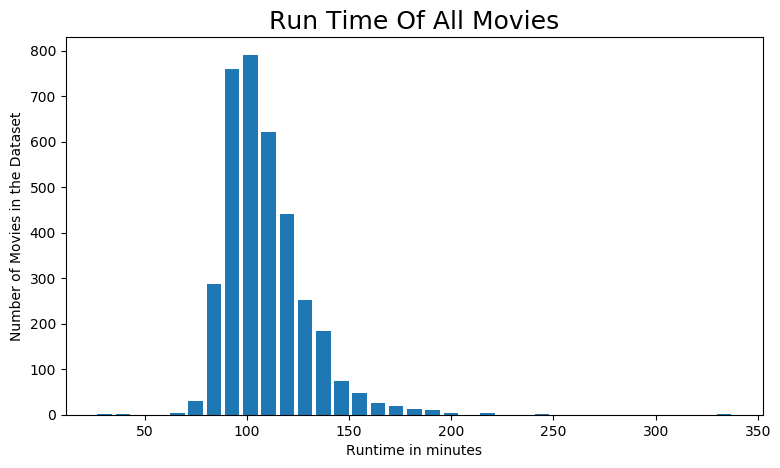

In [25]:
# I will present the runtime in a graphical form
plt.figure(figsize=(9,5), dpi=100)
plt.hist(df['runtime'], rwidth=.8, bins=35)
plt.title("Run Time Of All Movies", fontsize=18)
plt.xlabel('Runtime in minutes')
plt.ylabel("Number of Movies in the Dataset")
plt.show();

> When observed, The distribution of the runtime histogram is Right Skewed and Most movies lies between 80 and 120 minutes long

In [26]:
#let's find the the runtime statistical discription
RT_disc = df['runtime'].describe()
RT_disc

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

**So, By looking at both the plot and calculations, we can conclude that..**

>25% of movies have a runtime of less than 96 minutes

>50% of movies have a runtime of less than 106 minutes. (median)

>75% of movies have a runtime of less than 119 minutes

Text(0,0.5,'Runtime describtion')

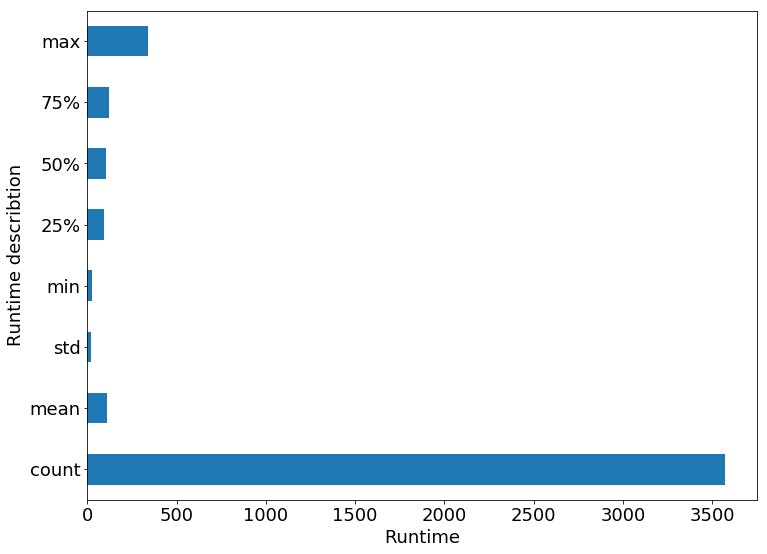

In [27]:
# now let's find the the runtime statistical discription in graphical representaion 
fig = RT_disc.plot.barh(fontsize=18)
fig.figure.set_size_inches(12,9)
fig.set_xlabel('Runtime', fontsize=18)
fig.set_ylabel('Runtime describtion', fontsize=18)

### Research Question 6  (In which year we had most no. of profitable movies)

In [31]:
# I will count the most profit year 
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.idxmax()

2015

> The most profit year is 2015. So i'll represent this graphically 

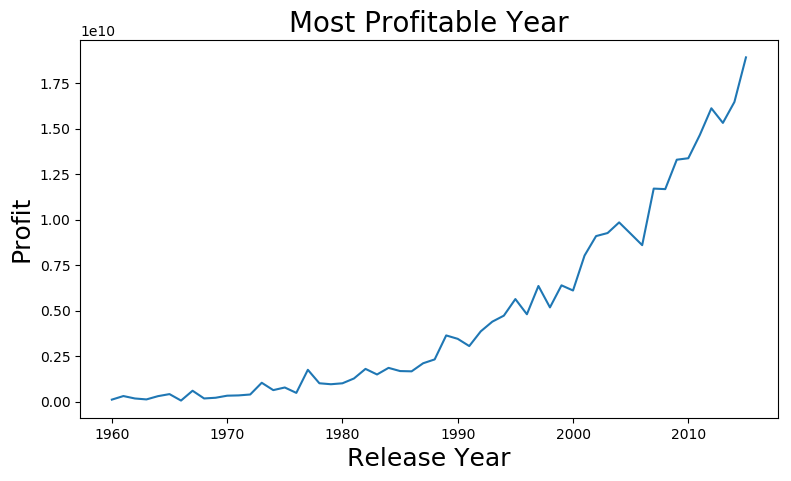

In [38]:
plt.figure(figsize=(9,5), dpi=100)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.title('Most Profitable Year', fontsize=20)
plt.plot(profit_year);


> So from the graph we conclude that the profit of movies has positive relation with the increase of years and the most profit year is 2015

### Research Question 7  (Successful genres (with respect to the profitable movies))

**First I want to specify the profitable movies**

In [44]:
# I wil find the mean of profit 
prof_mean = df.profit.mean().round()
prof_mean

75118992.0

In [46]:
# thn I'll query it to find the most profitable movies
prof_movies = df.query('profit >= 75118992.0')
prof_movies.head(2)

,profit,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [47]:
len(prof_movies)

1011

> now we have 1011 rows of profitable movies

In [55]:
#First I'll split the genres into categories
genre_data = prof_movies['genres'].str.cat(sep='|')
genre_data = pd.Series(genre_data.split('|'))
genre_data

0                Action
1             Adventure
2       Science Fiction
3              Thriller
4                Action
             ...       
2873          Adventure
2874            Fantasy
2875             Action
2876    Science Fiction
2877             Comedy
Length: 2878, dtype: object

In [57]:
# second I'll count the values in the genre_data variable
genre_count = genre_data.value_counts()
genre_count.head()

Comedy       369
Action       366
Drama        343
Adventure    309
Thriller     290
dtype: int64

> I found that the "Comedy" genre is the most frequent in the Profitable movies, Now let's do this in graphical form 

Text(0,0.5,' ')

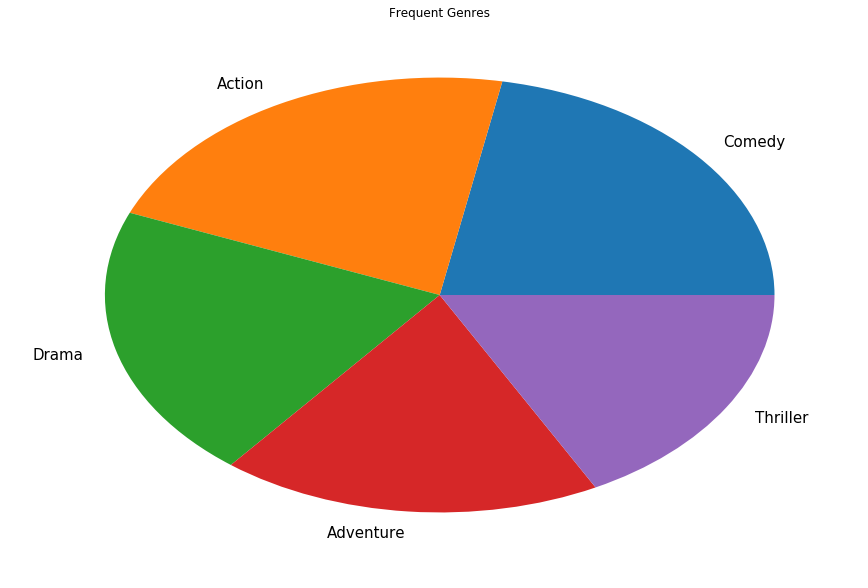

In [96]:
# reqresenting the most frequent genres only 
pieplot = genre_count.head().plot.pie(title='Frequent Genres',fontsize=15, figsize=(15,10))
pieplot.set_xlabel(' ')
pieplot.set_ylabel(' ')

> So from the data and the visuals we conclude that "Comedy" and "Action" genres is the most frequent but "Comedy" is the Largest between profitable movies

### Research Question 8  (Most frequent cast (with respect to the profitable movies))

**First I'll split the cast into actors**

In [101]:
actor = prof_movies['cast'].str.cat(sep='|')
actor = pd.Series(actor.split('|'))
actor

0               Chris Pratt
1       Bryce Dallas Howard
2               Irrfan Khan
3         Vincent D'Onofrio
4             Nick Robinson
               ...         
5050           John Belushi
5051           Tim Matheson
5052            John Vernon
5053            Verna Bloom
5054              Tom Hulce
Length: 5055, dtype: object

**Second I'll count the values of each actor**

In [113]:
actor_count = actor.value_counts()
actor_count.head()

Tom Cruise            26
Tom Hanks             20
Sylvester Stallone    19
Brad Pitt             19
Adam Sandler          18
dtype: int64

> So, I found that "Tom Cruise" is the most frequent actor in profitable movies and followed by "Tom Hanks" and "Sylvester Stallone"

**Let's visualize our findings**

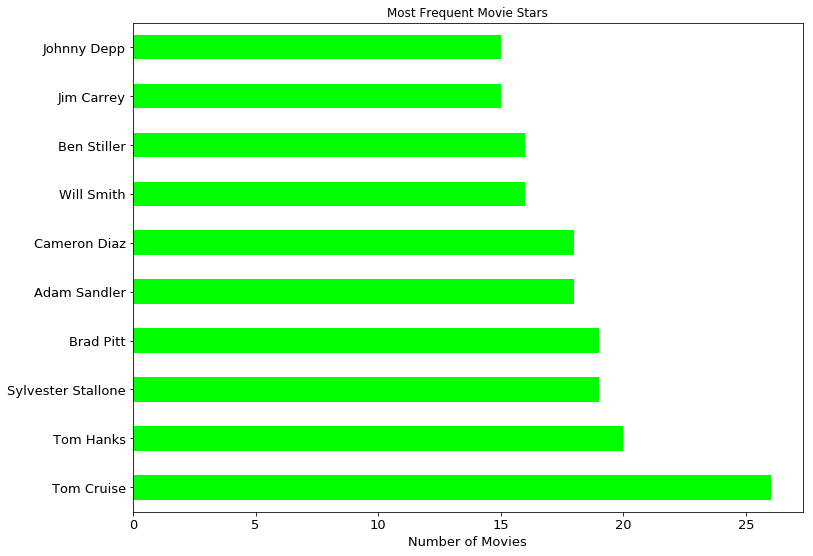

In [127]:
actor_count.sort_values(ascending=False, inplace=True)
barplot = actor_count.head(10).plot.barh(color = '#00FF00', fontsize = 13)
barplot.set(title='Most Frequent Movie Stars')
barplot.set_xlabel('Number of Movies', color = 'black', fontsize = '13')
barplot.figure.set_size_inches(12, 9)
plt.show();

> After visualizing we found out the same results as before

### Research Question 9  (Average budget (with respect to the profitable movies))

**In the upcoming cells I'll use a function to count the mean (Average) for a column**

In [133]:
# function with respect to profitable movies
def avg_col_prof(x):
    return prof_movies[x].mean().round()

#Calling the function on budget column
budget_prof = avg_col_prof('budget')
print('The average budget of profitable movies is {} Dollars'.format(budget_prof))

The average budget of profitable movies is 67811342.0 Dollars


### Research Question 10  (Average revenue (with respect to the profitable movies))

In [132]:
# Calling the function on revenue column 
revenue_prof = avg_col_prof('revenue')
print('The average revenue of profitable movies is {} Dollars'.format(revenue_prof))

The average revenue of profitable movies is 303556219.0 Dollars


### Research Question 11  (Average duration of the movie (with respect to the profitable movies))

In [131]:
# Calling the function on runtime column
runtime_prof = avg_col_prof('runtime')
print('The average duration of profitable movies is {} minutes'.format(runtime_prof))

The average duration of profitable movies is 115.0 minutes


<a id='conclusions'></a>
## Conclusions

**For a Movie to be in successful criteria**

> 1) Average Budget must be around 67 millon dollar

> 2) Average duration of the movie must be 115 minutes 
    
> 3) Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz

> 4) Genre must be : Action, Adventure, Thriller, Comedy, Drama.

> **LIMITATIONS:** This analysis was done considering the movies which had a significant amount of profit of around 75 million dollars. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is complete and corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

## Submitting your Project 

In [136]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0